Just a quick notebook to show gradient descent in action

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [30]:
data_file = "tumours.pkl"
tumours = pd.read_pickle(data_file)

In [31]:
tumours

,Tumour size (mm),Tumour is malignant
0,58.7,False
1,41.9,False
2,86.4,True
3,99.7,True
4,87.9,False
...,...,...
99995,35.7,False
99996,63.1,False
99997,60.4,False
99998,96.9,True


In [32]:
# Perform Logistic Regression

X = tumours['Tumour size (mm)'].values
X = (X - X.mean())/X.std()  # Normalise the data
y = tumours['Tumour is malignant'].values

# Use sklearn's train_test_split to split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2)

# Use sklearn's LogisticRegression to fit a model to the training data
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_preds = clf.predict(X_test)

# Use sklearn's confusion_matrix to evaluate the model's predictions
from sklearn.metrics import confusion_matrix

the_confusion_matrix = confusion_matrix(y_test, y_preds)
#print('Confusion matrix:')
#print(the_confusion_matrix)

# Print the model's accuracy
print(f'Accuracy: {clf.score(X_test, y_test)}')

Accuracy: 0.74435


In [33]:
print(clf.coef_)

[[0.99138693]]


In [34]:
import numpy as np

# Sigmoid function to map input 'u' to a probability between 0 and 1
def sigma(u):
    return 1 / (1 + np.exp(-u))

# Function to calculate the gradient for logistic regression
def gradient(w, x, y):
    # Calculate predicted probabilities using the sigmoid function
    y_prob = sigma(np.dot(x, w))
    
    # Calculate the gradient
    # 1. (y - y_prob) is the error between actual and predicted values
    # 2. y_prob * (1 - y_prob) is the derivative of the sigmoid function
    # 3. Multiply the error by the derivative of the sigmoid and the input x
    # 4. Reshape the result to ensure correct dimensions
    # 5. Take the mean across all examples
    gradient = (-x * (y_prob * (1 - y_prob) * (y - y_prob)).reshape(-1, 1)).mean(axis=0)
    
    return gradient

### Explanation:
 **`gradient` function**:
   - **Inputs**:
     - `w`: weight vector (model parameters)
     - `x`: feature matrix (input data)
     - `y`: actual labels (target values)
   - **Steps**:
     1. Calculate `y_prob`: This is the predicted probability of the positive class for each example.
     2. Calculate the gradient:
        - `(y - y_prob)`: This is the error between the actual and predicted values.
        - `y_prob * (1 - y_prob)`: This is the derivative of the sigmoid function, representing how much change in `u` affects the probability.
        - `(-x * (y_prob * (1 - y_prob) * (y - y_prob)).reshape(-1, 1))`: This combines the inputs, errors, and derivatives.
        - `.mean(axis=0)`: Computes the mean gradient across all examples to update the weights.
   
This function helps update the weights in logistic regression using gradient descent.

In [35]:
# Function to calculate the loss for logistic regression
def loss(w, x, y):
    # Calculate predicted probabilities using the sigmoid function
    y_prob = sigma(np.dot(x, w))
    
    # Calculate the loss using the binary cross-entropy formula
    # 1. y * np.log(y_prob): Log loss for true class
    # 2. (1 - y) * np.log(1 - y_prob): Log loss for false class
    # 3. Combine both terms and take the negative mean
    loss_value = -(y * np.log(y_prob) + (1 - y) * np.log(1 - y_prob)).mean()
    
    return loss_value

### Explanation:

2. **`loss` function**:
   - **Inputs**:
     - `w`: weight vector (model parameters)
     - `x`: feature matrix (input data)
     - `y`: actual labels (target values)
   - **Steps**:
     1. Calculate `y_prob`: Predicted probabilities for each example using the sigmoid function.
     2. Calculate the binary cross-entropy loss:
        - `y * np.log(y_prob)`: Logarithmic loss for cases where the actual label is 1.
        - `(1 - y) * np.log(1 - y_prob)`: Logarithmic loss for cases where the actual label is 0.
        - `-(...)`: Combine both terms, summing the losses for each example.
        - `.mean()`: Take the mean of the loss values to get the average loss across all examples.

This function measures how well the model's predictions align with the actual labels, with lower values indicating better performance.


In [36]:
np.random.seed(0)

def fit(X, y, learning_rate=1, epochs=200): 
    #number_of_weights = X.shape[1]  # Number of weights is equal to the number of features
    #w = np.random.randn(number_of_weights)  # Initialize weights with random values
    w = np.zeros(X.shape[1])
    loss_t = []  # List to store the loss at each epoch

    # Gradient descent
    for t in range(epochs):
        # Calculate the gradient
        grad = gradient(w, X, y)
        
        # Update weights
        w = w - (learning_rate * grad)
        
        # Calculate and store the loss
        current_loss = loss(w, X, y)
        loss_t.append(current_loss)
        
    return w, loss_t

In [37]:
rows = X.shape[0]  # Number of rows in the dataset
constant_column = np.ones((rows, 1))
pd.DataFrame(constant_column) # Just visualising the constant column

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
99995,1.0
99996,1.0
99997,1.0
99998,1.0


In [38]:
X = tumours['Tumour size (mm)']
X = (X - X.mean())/X.std()  # Normalise the data
X = pd.DataFrame(X)

In [39]:
X2 = np.hstack( [X.values, constant_column] )
# This is the equivalent of 
# pd.concat([X_norm, pd.Series(1, index=X_norm.index)], axis=1).to_numpy() 
pd.DataFrame(X2)  # Just visualising the new X matrix

,0,1
0,0.300023,1.0
1,-0.282463,1.0
2,1.260431,1.0
3,1.721566,1.0
4,1.312439,1.0
...,...,...
99995,-0.497429,1.0
99996,0.452578,1.0
99997,0.358965,1.0
99998,1.624485,1.0


[ 1.14177837 -0.81349356]


Text(0, 0.5, 'Loss')

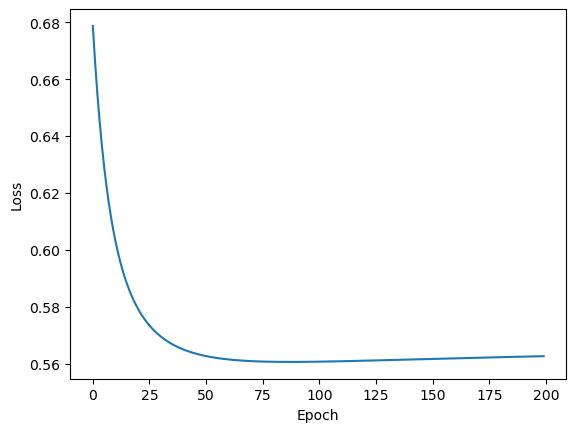

In [40]:
w, loss_t = fit(X2, y)
print(w)
plt.plot(loss_t)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [41]:
clf.coef_

array([[0.99138693]])

In [42]:
w[:-1]

array([1.14177837])